# ML Lab 3 Tasks
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Note!
Check hints in [Cheatsheet](https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/00_cheatsheet.ipynb)

# Task 3.1
_Get mnist data_

```python
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
```
_Train simple model:_
- Inspect dataset
- Train binary Binary Classifier 5 or not 5 with SGDClassifier
- Measure Accuracy Using Cross-Validation

_Type your code below_

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# --- Get MNIST data ---
mnist = fetch_openml('mnist_784', as_frame=False)

X = mnist.data
y = mnist.target.astype(np.int8)

# --- Create binary labels: is 5 or not 5 ---
y_5 = (y == 5)

# --- Train simple SGDClassifier ---
clf = SGDClassifier(random_state=42)

# --- Evaluate using cross-validation (3-fold is typical for MNIST) ---
scores = cross_val_score(clf, X, y_5, cv=3, scoring="accuracy")

print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy scores: [0.96794377 0.94797069 0.96194231]
Mean accuracy: 0.9592855905973937


# Task 3.2
_Check model results_
- Check Confusion Matrix
- Get Precision,  Recall and f1 score
_Check Precision/Recall Trade-off_
- Experiment with different threshold values
- Calculate precision-recall curve and make precision-recall plot
- Calculate ROC curve and make ROC curve plot
- Calcuate ROC AUC score

_Type your code below_

Confusion Matrix:
 [[12620   107]
 [  334   939]]
Precision: 0.8977055449330784
Recall: 0.7376276512175962
F1 score: 0.8098318240620958
Threshold     0 → Precision: 0.8977, Recall: 0.7376
Threshold  1000 → Precision: 0.9360, Recall: 0.6551
Threshold -1000 → Precision: 0.8410, Recall: 0.8146


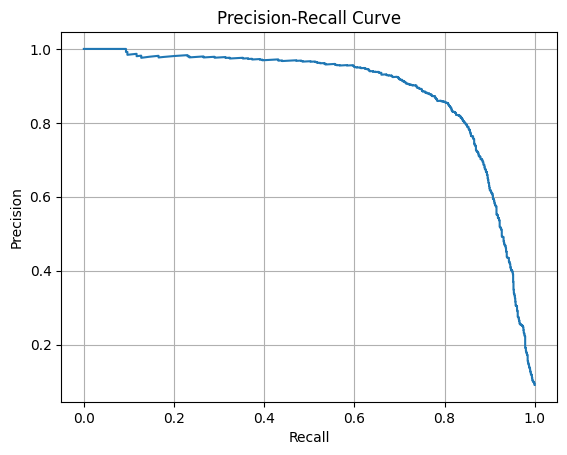

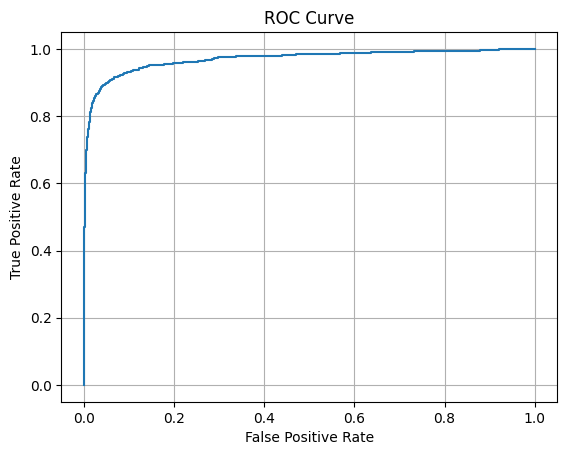

ROC AUC Score: 0.9695672695399077


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- Split train/test ---
X_train, X_test, y_train, y_test = train_test_split(X, y_5, test_size=0.2, random_state=42)

# --- Train classifier ---
clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = clf.predict(X_test)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# --- Precision / Recall / F1 ---
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# --- Experiment with different thresholds ---
y_scores = clf.decision_function(X_test)

def predict_with_threshold(threshold):
    return (y_scores > threshold)

for t in [0, 1000, -1000]:
    y_threshold_pred = predict_with_threshold(t)
    print(f"Threshold {t:>5} → Precision: {precision_score(y_test, y_threshold_pred):.4f}, "
          f"Recall: {recall_score(y_test, y_threshold_pred):.4f}")

# --- Precision-Recall curve ---
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

# --- ROC curve ---
fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

# --- ROC AUC ---
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC Score:", roc_auc)


# Task 3.3
_Compare 2 models_
- Train binary Binary Classifier 5 or not 5 with RandomForestClassifier
- Compare results of  RandomForestClassifier with SGDClassifier usign precision-recall curve plot

_Type your code below_

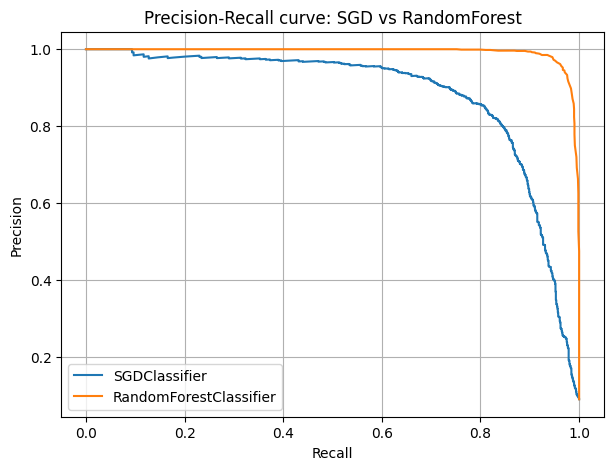

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

X_train, X_test, y_train, y_test = train_test_split(
    X, y_5, test_size=0.2, random_state=42
)

# --- Model 1: SGDClassifier (jak wcześniej) ---
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_scores_sgd = sgd_clf.decision_function(X_test)

precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(
    y_test, y_scores_sgd
)

# --- Model 2: RandomForestClassifier ---
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

# dla RF bierzemy prawdopodobieństwo klasy "1" (czyli "5")
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(
    y_test, y_proba_rf
)

# --- Wspólny wykres Precision-Recall ---
plt.figure(figsize=(7, 5))
plt.plot(recalls_sgd, precisions_sgd, label="SGDClassifier")
plt.plot(recalls_rf, precisions_rf, label="RandomForestClassifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve: SGD vs RandomForest")
plt.legend()
plt.grid(True)
plt.show()


# Task 3.4
_Perform Multiclass Classification_
- Train binary Multiclass Classifier (0-9) with Support Vector Classifier (SVC)

_Error Analysis_
- display multiclass Confusion Matrix
- display multiclass Confusion Matrix normalized by row

_Type your code below_

Confusion Matrix:
 [[12718     9]
 [   54  1219]]


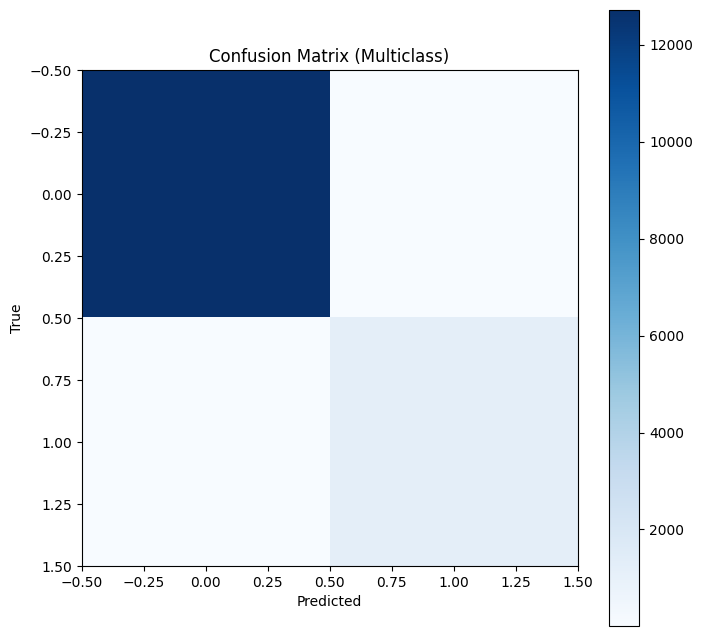

Row-normalized Confusion Matrix:
 [[9.99292842e-01 7.07158011e-04]
 [4.24194815e-02 9.57580518e-01]]


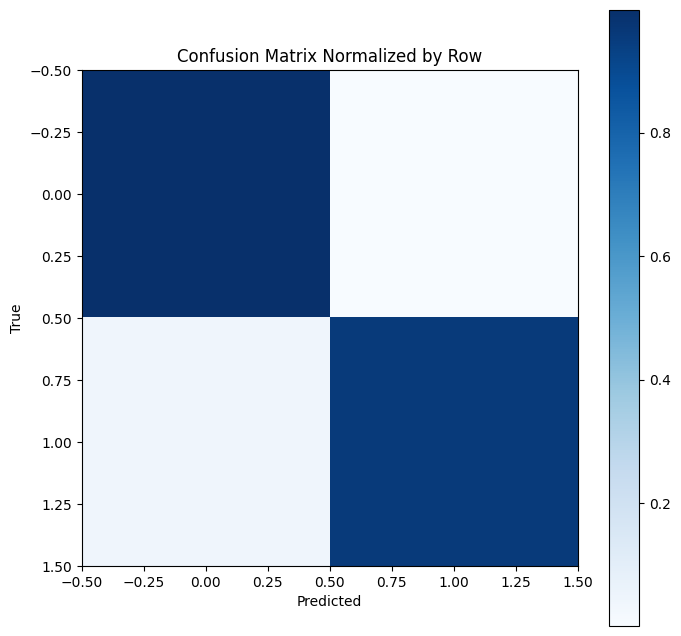

In [8]:
from sklearn.svm import SVC



# --- Train Multiclass SVC (One-vs-One is default for SVC) ---
svc_clf = SVC(kernel="rbf", gamma="scale")  # możesz użyć linear, ale rbf działa lepiej
svc_clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = svc_clf.predict(X_test)

# --- Multiclass Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# --- Display Confusion Matrix ---
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (Multiclass)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()

# --- Row-normalized Confusion Matrix ---
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

print("Row-normalized Confusion Matrix:\n", cm_norm)

plt.figure(figsize=(8, 8))
plt.imshow(cm_norm, cmap="Blues")
plt.title("Confusion Matrix Normalized by Row")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()


# Task 3.5
 _Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the `KNeighborsClassifier` works quite well for this task; you just need to find good hyperparameter values (try a grid search on the `weights` and `n_neighbors` hyperparameters)._

 _Type your code below_

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Zakładamy, że X_train, X_test, y_train, y_test już istnieją w pamięci

# Pipeline: skalowanie + KNN
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# Przestrzeń hiperparametrów (mała, żeby było szybko)
param_dist = {
    "knn__n_neighbors": randint(3, 15),     # losowe k z przedziału 3–14
    "knn__weights": ["uniform", "distance"]
}

# RandomizedSearchCV – szybsze niż grid search
random_search = RandomizedSearchCV(
    knn_pipe,
    param_distributions=param_dist,
    n_iter=12,          # liczba losowych kombinacji (możesz zmniejszyć do 8)
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Trening
random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)

# Najlepszy model
best_model = random_search.best_estimator_

# Ocena na teście
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("Test accuracy:", test_acc)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params: {'knn__n_neighbors': 8, 'knn__weights': 'distance'}
Best CV accuracy: 0.9861249990345012
Test accuracy: 0.9887142857142858


# Task 3.6
_Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. You can use the `shift()` function from the `scipy.ndimage` module. For example, `shift(image, [2, 1], cval=0)` shifts the image two pixels down and one pixel to the right. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation_ or _training set expansion_._


_Type your code below_

In [10]:
from scipy.ndimage import shift
import numpy as np
from sklearn.metrics import accuracy_score

# funkcja przesuwająca obrazek MNIST o 1 piksel w danym kierunku
def shift_image(image, dx, dy):
    img = image.reshape(28, 28)
    shifted = shift(img, shift=[dy, dx], cval=0, mode="constant")
    return shifted.reshape(-1)

# tworzymy rozszerzony zbiór treningowy: oryginały + 4 przesunięcia
X_aug_list = [X_train]
y_aug_list = [y_train]

directions = [
    (1, 0),    # prawo
    (-1, 0),   # lewo
    (0, 1),    # dół
    (0, -1)    # góra
]

for dx, dy in directions:
    X_shifted = np.apply_along_axis(shift_image, 1, X_train, dx, dy)
    X_aug_list.append(X_shifted)
    y_aug_list.append(y_train)

X_train_aug = np.concatenate(X_aug_list, axis=0)
y_train_aug = np.concatenate(y_aug_list, axis=0)

print("Rozmiar oryginalnego zbioru:", X_train.shape[0])
print("Rozmiar po augmentacji:", X_train_aug.shape[0])

# trening najlepszego modelu z Task 3.5 na rozszerzonym zbiorze
best_model.fit(X_train_aug, y_train_aug)

# ocena na zbiorze testowym
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Test accuracy po augmentacji:", test_acc)


Rozmiar oryginalnego zbioru: 56000
Rozmiar po augmentacji: 280000
Test accuracy po augmentacji: 0.9922142857142857


# Task 3.7
_Solve Titanic challenge on [Kaggle](https://www.kaggle.com/c/titanic). Alternatively, or get two CSV files: train.csv and test.csv  from :_
```python
url_titanic_train = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/titanic/train.csv'
url_titanic_test = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/titanic/test.csv'
```

 _The goal is to train a classifier that can predict the `Survived` column based on the other columns._

HTTPError: HTTP Error 404: Not Found

# Task 3.8

_Build a spam classifier:_

* _Download examples of spam and ham from [Apache SpamAssassin's public datasets](https://spamassassin.apache.org/old/publiccorpus/)._
* _Unzip the datasets and familiarize yourself with the data format._
* _Split the datasets into a training set and a test set._
* _Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, "Hello," "how," "are," "you," then the email "Hello you Hello Hello you" would be converted into a vector [1, 0, 0, 1] (meaning [“Hello" is present, "how" is absent, "are" is absent, "you" is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word._

_You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with "URL," replace all numbers with "NUMBER," or even perform _stemming_ (i.e., trim off word endings; there are Python libraries available to do this)._

_Finally, try out several classifiers and see if you can build a spam classifier, with both high recall and high precision._